In [1]:
import sys
sys.executable

'C:\\Users\\SEAN\\anaconda3\\envs\\Carbon_Cloud\\python.exe'

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Creating a dataframe
transport_df = pd.read_csv("Transportation_Preprocessed_Grouped_Dataset.csv")
transport_df.head(5)

,make,model,vehicle_class,engine_size,cylinders,fuel_type,fuel_consumption_comb,co2_emissions
0,others,ILX,cluster0,2.0,4,Z,8.5,196
1,others,ILX,cluster0,2.4,4,Z,9.6,221
2,others,ILX,cluster0,1.5,4,Z,5.9,136
3,others,MDX,cluster3,3.5,6,Z,11.1,255
4,others,RDX,cluster3,3.5,6,Z,10.6,244


In [4]:
# Qualitative / Categorical Variables :- make, model, vehicle_class, transmission, fuel_type
transport_df_qualitative = transport_df.drop(['engine_size','cylinders','fuel_consumption_comb','co2_emissions'], axis=1)

In [5]:
# Visualizing unique_categories_count & Observations/sample_count for each categories related to all Qualitative Variables
for i in transport_df_qualitative.columns:
    category_count = transport_df[i].value_counts()
    print(category_count)
    print("Unique categories count for", i ,":",transport_df[i].nunique())
    print()

make
FORD             628
CHEVROLET        587
BMW              527
MERCEDES-BENZ    419
others           406
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
Name: count, dtype: int64
Unique categories count for make : 31

model
I series       230
COOPER         204
F-150          191
M series       153
911 CARRERA    134
              ... 
CROSSTOUR        1
TELLURIDE        1
AVIATOR          1
ROUTAN           1
GR SUPRA         1
Name: count, Length: 351, dtype: int64
Unique categories count f

In [6]:
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make                   7384 non-null   object 
 1   model                  7384 non-null   object 
 2   vehicle_class          7384 non-null   object 
 3   engine_size            7384 non-null   float64
 4   cylinders              7384 non-null   int64  
 5   fuel_type              7384 non-null   object 
 6   fuel_consumption_comb  7384 non-null   float64
 7   co2_emissions          7384 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 461.6+ KB


In [7]:
from category_encoders import TargetEncoder

# Assuming 'data' is your DataFrame containing the dataset
# 'make' and 'model' are categorical variables, and 'co2_emission' is the target variable

# Define categorical variables
categorical_cols = ['make','model']

# Initialize target encoder
encoder = TargetEncoder()

# Fit target encoder on the categorical variables
encoded_data = transport_df.copy()  # Create a copy of the original DataFrame to preserve the original data
transport_df[categorical_cols] = encoder.fit_transform(transport_df[categorical_cols], transport_df['co2_emissions'])
transport_df

,make,model,vehicle_class,engine_size,cylinders,fuel_type,fuel_consumption_comb,co2_emissions
0,309.618227,232.524456,cluster0,2.0,4,Z,8.5,196
1,309.618227,232.524456,cluster0,2.4,4,Z,9.6,221
2,309.618227,232.524456,cluster0,1.5,4,Z,5.9,136
3,309.618227,247.769651,cluster3,3.5,6,Z,11.1,255
4,309.618227,248.611069,cluster3,3.5,6,Z,10.6,244
...,...,...,...,...,...,...,...,...
7379,230.057076,244.834960,cluster3,2.0,4,Z,9.4,219
7380,230.057076,246.141748,cluster3,2.0,4,Z,9.9,232
7381,230.057076,246.141748,cluster3,2.0,4,Z,10.3,240
7382,230.057076,248.147976,cluster6,2.0,4,Z,9.9,232


In [8]:
# Encoding categorical variable Label Encoding.

label_encoding_columns = transport_df.drop(['make', 'model', 'engine_size','cylinders','fuel_consumption_comb','co2_emissions'], axis=1)

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical variable
for i in label_encoding_columns.columns:
    transport_df[i] = label_encoder.fit_transform(transport_df[i])

transport_df

,make,model,vehicle_class,engine_size,cylinders,fuel_type,fuel_consumption_comb,co2_emissions
0,309.618227,232.524456,0,2.0,4,3,8.5,196
1,309.618227,232.524456,0,2.4,4,3,9.6,221
2,309.618227,232.524456,0,1.5,4,3,5.9,136
3,309.618227,247.769651,3,3.5,6,3,11.1,255
4,309.618227,248.611069,3,3.5,6,3,10.6,244
...,...,...,...,...,...,...,...,...
7379,230.057076,244.834960,3,2.0,4,3,9.4,219
7380,230.057076,246.141748,3,2.0,4,3,9.9,232
7381,230.057076,246.141748,3,2.0,4,3,10.3,240
7382,230.057076,248.147976,6,2.0,4,3,9.9,232


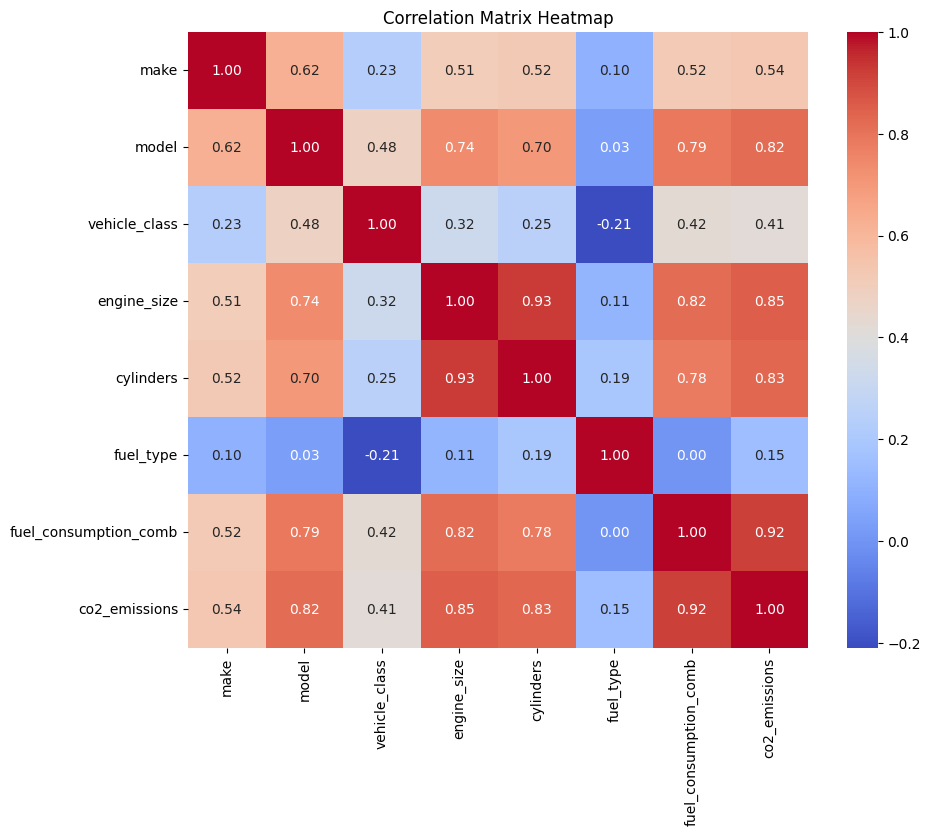

In [9]:
# Calculating the correlation matrix
corr_matrix = transport_df.corr()

# Ploting the HEATMAP
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix Heatmap")
plt.show()

In [10]:
# Writing the Encoded transport_df to a CSV file
transport_df.to_csv('Transportation_Target_Label_Encoded_Dataset.csv', index=False)